In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('bank.xlsx', sheet_name = 'bank')

In [5]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4681,27,student,single,tertiary,no,3733,yes,no,telephone,13,feb,299,6,-1,0,unknown,yes
2553,34,housemaid,married,tertiary,no,0,no,no,cellular,18,aug,148,1,84,2,failure,yes
109,41,blue-collar,married,primary,no,1250,yes,no,unknown,20,may,1392,2,-1,0,unknown,yes
8920,57,management,married,tertiary,no,1410,yes,no,cellular,10,jul,185,1,-1,0,unknown,no
9930,20,student,single,primary,no,0,no,no,cellular,1,feb,143,5,91,8,failure,no


In [6]:
df.shape

(11162, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Exploratory Data Analysis

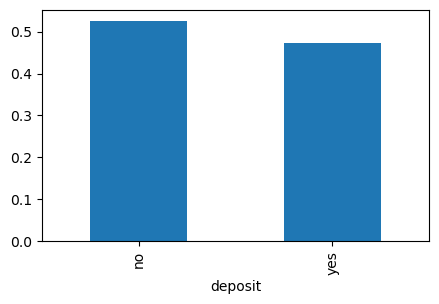

In [10]:
ct = df['deposit'].value_counts(normalize = True)
plt.figure(figsize = (5,3))
ct.plot(kind = 'bar')
plt.show()

## Bivariate Analysis
### Balance vs Deposit

In [12]:
mn = df.groupby('deposit')['balance'].agg('mean')
print("Mean is", mn)

Mean is deposit
no     1280.227141
yes    1804.267915
Name: balance, dtype: float64


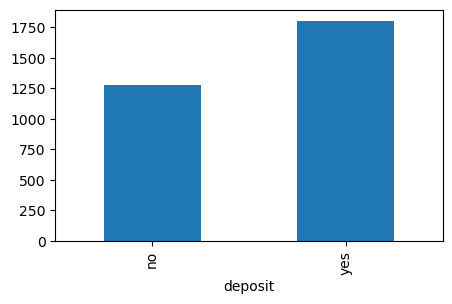

In [13]:
plt.figure(figsize = (5,3))
mn.plot.bar()
plt.show()

### Job vs Deposit

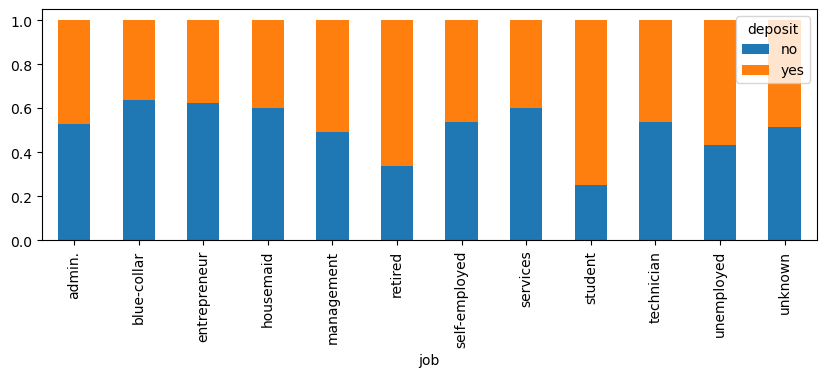

In [15]:
ct = pd.crosstab(df['deposit'], df['job'], normalize = 1).T
ct.plot.bar(stacked = True, figsize = (10,3))
plt.show()

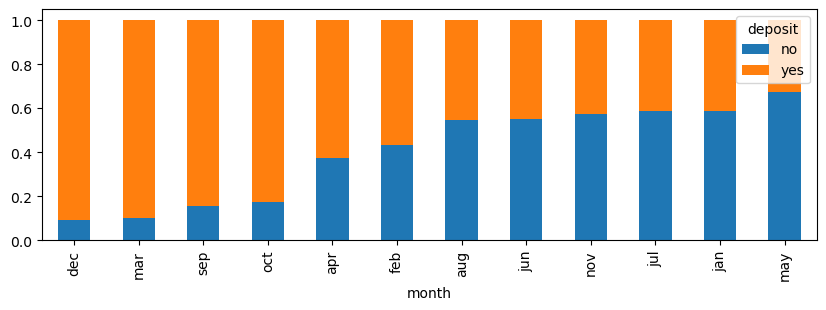

In [16]:
ct = pd.crosstab(df['deposit'], df['month'], normalize = 1).T.sort_values(by = 'yes', ascending = False)
ct.plot.bar(stacked = True, figsize = (10,3))
plt.show()

### Age vs Balance

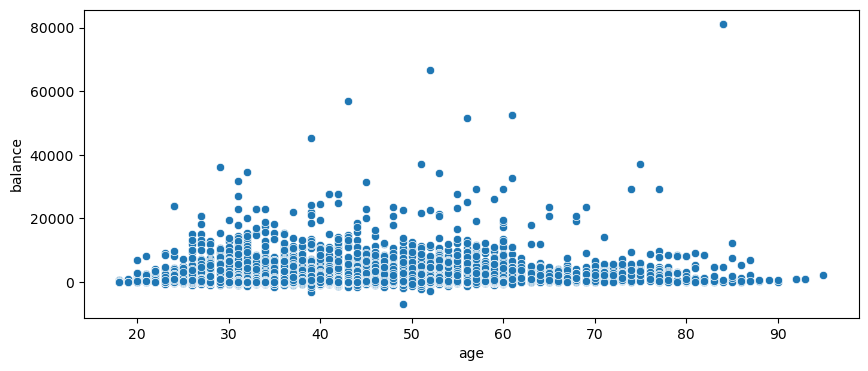

In [18]:
plt.figure(figsize = (10,4))
sns.scatterplot(data = df, x = 'age', y = 'balance')
plt.show()

In [20]:
df['age_cat'] = pd.cut(df['age'], bins = [17,40,60,80,96])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_cat
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,"(40, 60]"
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,"(40, 60]"
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,"(40, 60]"
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,"(40, 60]"
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,"(40, 60]"


In [21]:
df.groupby('age_cat', observed = True)['age'].agg(['min', 'max'])

,min,max
age_cat,,
"(17, 40]",18,40
"(40, 60]",41,60
"(60, 80]",61,80
"(80, 96]",81,95


In [22]:
mn = df.groupby('age_cat', observed = True)['balance'].agg('mean')
mn

age_cat
(17, 40]    1308.606618
(40, 60]    1656.558310
(60, 80]    2639.280576
(80, 96]    4933.109091
Name: balance, dtype: float64

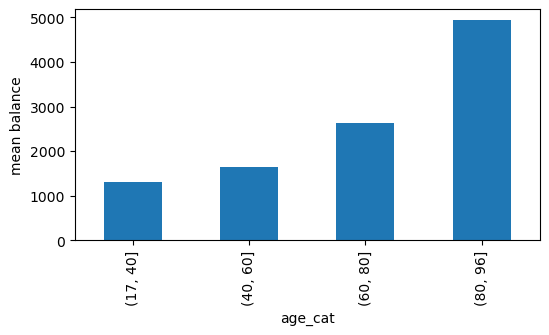

In [23]:
plt.figure(figsize = (6,3))
mn.plot.bar()
plt.ylabel('mean balance')
plt.show()

In [24]:
df['balance'].quantile([.25, .5, .75])

0.25     122.0
0.50     550.0
0.75    1708.0
Name: balance, dtype: float64

In [25]:
df['bal_cat'] = pd.cut(df['balance'], bins = [-7000,122,550,1708,81204])

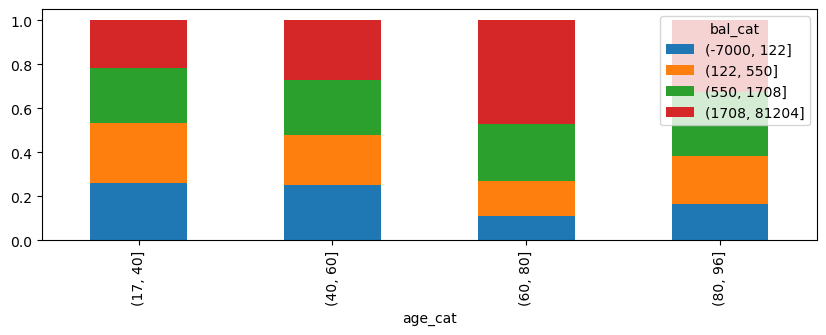

In [26]:
ct = pd.crosstab(df['age_cat'], df['bal_cat'], normalize = 0)
ct.plot.bar(stacked = True, figsize = (10,3))
plt.show()

## T-test

In [27]:
df0 = df['balance'][df['deposit'] == 'yes']
df1 = df['balance'][df['deposit'] == 'no']

In [53]:
from scipy import stats
stat, pvalue = stats.ttest_ind(df0, df1, equal_var = False)
print('T-statistic:', stat)
print('pvalue:', pvalue)

T-statistic: 8.520420767660433
pvalue: 1.8105789895875916e-17


### Job vs Balance

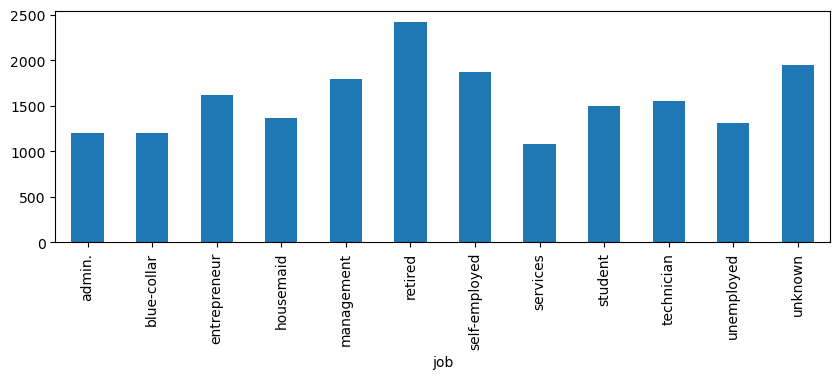

In [66]:
mean = df.groupby('job')['balance'].agg('mean')
mean.plot.bar(figsize = (10,3))
plt.show()

In [74]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

mod = ols('balance ~ job', data = df).fit()
anova_table = sm.stats.anova_lm(mod, typ = 2)

In [76]:
print(anova_table)

                sum_sq       df         F        PR(>F)
job       1.418253e+09     11.0  12.53428  6.367901e-24
Residual  1.146929e+11  11150.0       NaN           NaN


### Chi-square

In [81]:
ct = pd.crosstab(df['deposit'], df['job']).T
ct

deposit,no,yes
job,,
admin.,703,631
blue-collar,1236,708
entrepreneur,205,123
housemaid,165,109
management,1265,1301
retired,262,516
self-employed,218,187
services,554,369
student,91,269


In [83]:
from scipy.stats import chi2_contingency
chi2, pvalue, dof, expctd = chi2_contingency(ct)
print('chi2', chi2)
print('p-value', pvalue)

chi2 378.0752558664989
p-value 2.741689587081072e-74


In [85]:
print(expctd)

[[ 701.89768859  632.10231141]
 [1022.85540226  921.14459774]
 [ 172.58054112  155.41945888]
 [ 144.16789106  129.83210894]
 [1350.12703817 1215.87296183]
 [ 409.35262498  368.64737502]
 [ 213.09487547  191.90512453]
 [ 485.645852    437.354148  ]
 [ 189.41766708  170.58233292]
 [ 959.19001971  863.80998029]
 [ 187.83918653  169.16081347]
 [  36.83121304   33.16878696]]
